In [2]:
#We load the libraries
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('data/train.csv', header=0)

test = pd.read_csv('data/test.csv', header=0)

In [4]:
#We get informations about the different features we have and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
instant       10886 non-null int64
dteday        10886 non-null object
season        10886 non-null int64
yr            10886 non-null int64
mnth          10886 non-null int64
hr            10886 non-null int64
holiday       10886 non-null int64
weekday       10886 non-null int64
workingday    10886 non-null int64
weathersit    10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
hum           10886 non-null float64
windspeed     10886 non-null float64
cnt           10886 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 1.2+ MB


In [4]:
#We have 15 different features and 10 886 rows 
#We also know their is no information missing in one of the 10886 rows which is a good news. 
#We display the five first line to have a look into the datas
df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
10881,17089,2012-12-19,4,1,12,19,0,3,1,1,0.38,0.3939,0.50,0.3881,336
10882,17090,2012-12-19,4,1,12,20,0,3,1,1,0.36,0.3485,0.57,0.2239,241
10883,17091,2012-12-19,4,1,12,21,0,3,1,1,0.34,0.3182,0.61,0.2239,168
10884,17092,2012-12-19,4,1,12,22,0,3,1,1,0.34,0.3485,0.61,0.0896,129
10885,17093,2012-12-19,4,1,12,23,0,3,1,1,0.32,0.3333,0.66,0.1343,88


In [5]:
#Let's grab some informations about our features
print "We have %d different seasons" % len(df['season'].unique())
print df['season'].unique()
print "The features yr, holiday and working day are booleans"
print df['yr'].unique()
print df['holiday'].unique()
print df['workingday'].unique()
print "Weathersit has %d different values" % len(df['weathersit'].unique())
print df['weathersit'].unique()


We have 4 different seasons
[1 2 3 4]
The features yr, holiday and working day are booleans
[0 1]
[0 1]
[0 1]
Weathersit has 4 different values
[1 2 3 4]


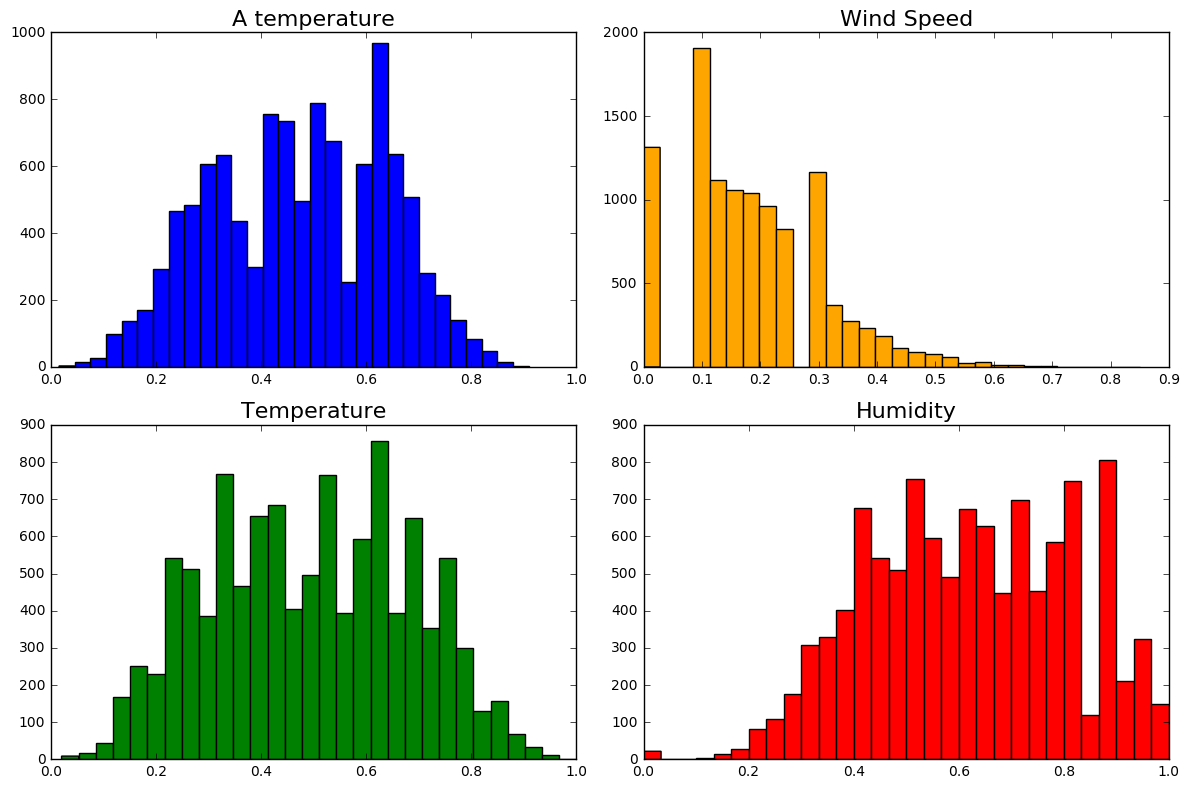

In [6]:
fig = plt.figure(figsize=(12, 8)) # (width, height)

fig.add_subplot(221) # 2 x 2 grid, 1st subplot
h = plt.hist(df['atemp'], bins=30, color='blue')
plt.title('A temperature', fontsize=16)

fig.add_subplot(222) # 2 x 2 grid, 2nd subplot
h = plt.hist(df['windspeed'], bins=30, color='orange')
plt.title('Wind Speed', fontsize=16)

fig.add_subplot(223) # 2 x 2 grid, 3rd subplot
h = plt.hist(df['temp'], bins=30, color='green')
plt.title('Temperature', fontsize=16)

fig.add_subplot(224) # 2 x 2 grid, 4th subplot
h = plt.hist(df['hum'], bins=30, color='red')
plt.title('Humidity', fontsize=16)

plt.tight_layout() # improve spacing between subplots

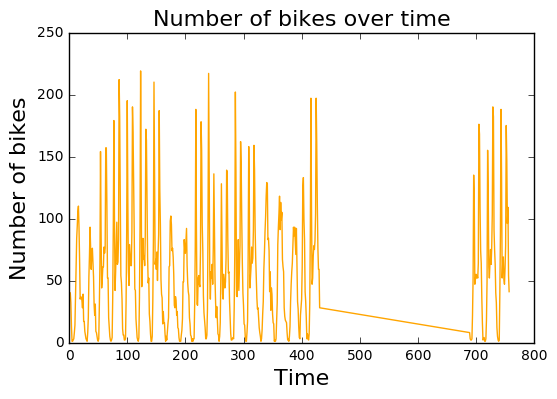

In [88]:
time = np.array(df['instant'])
nbBikes = np.array(df['cnt'])
plt.plot(time[1:500], nbBikes[1:500], '-', color='orange')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Number of bikes', fontsize=16)
plt.title('Number of bikes over time', fontsize=16)

On peut constater qu'il y a des "trou" temporel dans les données ce qui donne des discontinuité dans le temps

# Cross Validation Function

In [5]:
def cross_validate(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns the predictions.
    
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - predict_proba(X) to apply the trained classifier to the data X and return probability estimates 
    cv_folds: sklearn cross-validation object
        Cross-validation iterator.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape)
    for tr, te in cv_folds:
        classifier.fit(design_matrix[tr],labels[tr])
        y_pred = classifier.predict(design_matrix[te])
        pred[te] = y_pred
    return pred

# Data & Folds preparation

In [65]:
from datetime import datetime

y = np.array(df['cnt'])

def X_Builder(dataframe):
    samples = dataframe.shape[0]
    X = np.zeros((samples,15))

    for idx, string in enumerate(dataframe['dteday']):
        string =string+'-'+str(dataframe['hr'][idx])
        string = datetime.strptime(string, '%Y-%m-%d-%H')
        X[idx][0] = string.year #Year
        X[idx][1] = string.month #Month
        X[idx][2] = string.day #Day
        X[idx][3] = string.hour #Hour
        #seconds=(string-datetime(1970,1,1)).total_seconds()
        #time[idx] = seconds#Number of seconds since 1970
        X[idx][4] = dataframe['temp'][idx]#Temperature
        X[idx][5] = dataframe['hum'][idx]#humidity
        X[idx][6] = dataframe['atemp'][idx]
        X[idx][7] = dataframe['windspeed'][idx]
        X[idx][8] = dataframe['workingday'][idx]
        X[idx][9] = dataframe['holiday'][idx]
        X[idx][10] = dataframe['weekday'][idx]
        X[idx][11] = np.cos(string.month)
        X[idx][12] = np.sin(string.month)
        X[idx][13] = np.cos(string.hour)
        X[idx][14] = np.sin(string.hour)
    return X
X = X_Builder(df)
X_final = X_Builder(test)

In [77]:
# Set up a stratified 10-fold cross-validation
from sklearn import cross_validation
folds = cross_validation.StratifiedKFold(y, 10, shuffle=True)

# LINEAR REGRESSION

In [76]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e6) 
ypred_logreg = cross_validate(X[:,4:14], y, clf, folds)
print clf.score(X[:,4:14], y)

0.0406026088554


# K Nearest Neighbours

In [71]:
from sklearn import neighbors
from sklearn import metrics
perf = []

X_KNN = X[:,[2,4,5]]

for k in range(1, 100, 2): 
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    ypred = cross_validate(X,y,clf,folds)
    
    perf.append([clf.score(X,y),k])
print max(perf)

In [70]:
X_KNN = X[:,0:14]
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
ypred = cross_validate(X_KNN,y,clf,folds)
clf.score(X_KNN,y)

0.91475289362483925

In [73]:
ypred_final = clf.predict(X_final)

sizeTest=test['instant'].shape[0]
ypred_final_tab = np.zeros((sizeTest,2))

for idx, val in enumerate(test['instant']):
    ypred_final_tab[idx][0]=val
    ypred_final_tab[idx][1]=ypred_final[idx]

numpy.savetxt("prediction.csv", ypred_final_tab, delimiter=",")

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [90]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1, verbose=True)
param_grid = {"min_samples_split" : range(2,4) , "min_weight_fraction_leaf" : [0,0.01,0.1] }

bestEstimator = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1, verbose=1)
bestEstimator.fit(X,y)

score = cross_val_score(estimator, X, y).mean()
print("Score = %.2f" % score)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000

Score = 0.70


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [91]:
bestEstimator.best_params_

{'min_samples_split': 3, 'min_weight_fraction_leaf': 0}

In [93]:
from sklearn.cross_validation import cross_val_score
estimator = RandomForestRegressor(min_samples_split=3, n_estimators=1000, n_jobs=-1, verbose=True).fit(X,y)
score = cross_val_score(estimator, X, y).mean()
print("Score = %.2f" % score)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  42 tasks     

Score = 0.70


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [ ]:
predict = np.round(estimator.predict(X_final))
final = pandas.DataFrame()
final["id"] = instantTest
final["Prediction"] = predict
final.to_csv("Kaggle1.csv",index=False)